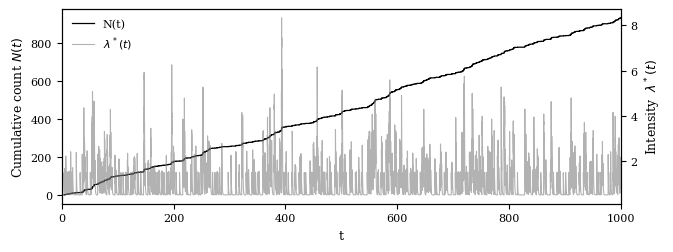

In [1]:
from pointprocess.simulation.hawkes_exp import HawkesExp
from pointprocess.simulation.hawkes_multiexp import HawkesMultiExp

T = 1000
params_exp = {"mu": 0.5, "alpha": 1, "beta": 2, "T": T}
hawkes_exp = HawkesExp(params_exp)
events_exp = hawkes_exp.events

# params_multiexp = {"T": T,
#   "mu": 0.5,
#   "alphas": [1.0, 0.2, 0.02],
#   "betas":  [5.0, 1.0, 0.2]}
# hawkes_multiexp = HawkesMultiExp(params_multiexp)

hawkes_exp.plot()

In [2]:
from pointprocess.estimation.mle import fit_hawkes

estimated_params = fit_hawkes(events=events_exp, T=T, H0="exp").params_dict
print(f"Estimated params : {estimated_params}")
print(f"True params : {params_exp}")

Estimated params : {'mu': np.float64(0.4721970995099719), 'alpha': np.float64(1.1773892840244793), 'beta': np.float64(2.3916249053153398), 'T': 1000}
True params : {'mu': 0.5, 'alpha': 1, 'beta': 2, 'T': 1000}


In [3]:
from pointprocess.testing.one_run import one_run

ks_r, ad_r, cvm_r, estimated_params, x = one_run(
            events=events_exp,
            T=T,
            H0="exp",
            method="khmaladze",
            alpha_level=0.05
        )

print(f"KS rejected: {ks_r}")
print(f"CvM rejected: {cvm_r}")
print(f"AD rejected: {ad_r}")

KS rejected: False
CvM rejected: False
AD rejected: False


In [4]:
from pointprocess.montecarlo.monte_carlo import monte_carlo_simulation

result = monte_carlo_simulation(
                M=50,
                process_generator=HawkesExp,
                H0="exp",
                method="khmaladze",
                alpha_level=0.05,
                csv_path="results/results.csv",
                config_path="config.yaml",
            )

print(f"Monte Carlo simulation result : {result}")

Starting Monte Carlo : M=50 | Process=HawkesExp | Method=khmaladze | H0=exp | Alpha=0.05
Loading parameters from config: config.yaml
10/50
20/50
30/50
40/50
50/50
50/50
Monte Carlo simulation result : {'generator': 'HawkesExp', 'M': 50, 'method': 'khmaladze', 'alpha_level': 0.05, 'KS': np.int64(4), 'CvM': np.int64(5), 'AD': np.int64(3), 'time_seconds': 2.290014100028202}


In [13]:
from results.print_res_sim import print_hawkes_table

print_hawkes_table(csv_file="results/results_exp.csv")


=== Résumé des tests (R_0.01; R_0.05; R_0.20) ===

╒════════════════╤════════════════╤═════════════════╤════════════════╤══════════════╤═══════════════╤══════════════╤══════════════════╤═══════════════════╤══════════════════╕
│      Test      │  KS (Transf.)  │  CvM (Transf.)  │  AD (Transf.)  │  KS (Naive)  │  CvM (Naive)  │  AD (Naive)  │  KS (Naive RTC)  │  CvM (Naive RTC)  │  AD (Naive RTC)  │
╞════════════════╪════════════════╪═════════════════╪════════════════╪══════════════╪═══════════════╪══════════════╪══════════════════╪═══════════════════╪══════════════════╡
│   HawkesExp    │   4; 29; 96    │    4; 25; 99    │   4; 25; 93    │   0; 1; 6    │    0; 0; 3    │   0; 1; 5    │     0; 0; 1      │      0; 0; 0      │     0; 0; 13     │
├────────────────┼────────────────┼─────────────────┼────────────────┼──────────────┼───────────────┼──────────────┼──────────────────┼───────────────────┼──────────────────┤
│    HawkesPL    │   5; 33; 111   │   5; 33; 108    │  11; 38; 129   │   

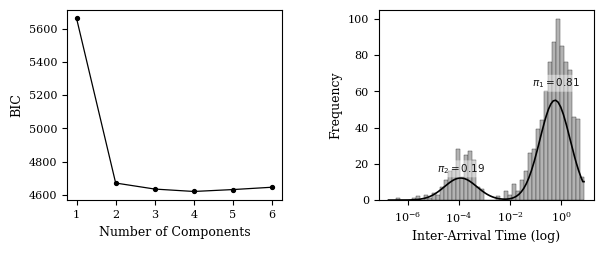

In [5]:
from pointprocess.utils.io import plot_gmm_interarrival_counts
from pointprocess.simulation.hawkes_pl import HawkesPL
from sklearn.mixture import GaussianMixture
from pointprocess.estimation.mle import estimate_betas_gmm
from pointprocess.utils.io import plot_bic_distrib

# params_pl = {"mu": 0.5, "alpha": 1, "beta": 2, "T": T}
# hawkes_pl = HawkesPL(params_pl)
# events_pl = hawkes_pl.events

params_multiexp = {"T": T,
  "mu": 0.5,
  "alphas": [1000, 0.2, 0.002],
  "betas":  [5000, 1.0, 0.02]}
hawkes_multiexp = HawkesMultiExp(params_multiexp)
events_multiexp = hawkes_multiexp.events

betas, info = estimate_betas_gmm(events_multiexp, n_components=None)

plot_bic_distrib(events_multiexp, info)


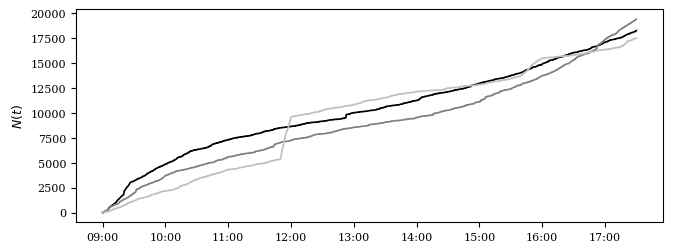

In [6]:
from pointprocess.utils.io import load_real_data, plot_counting_process, plot_multiple_days


date = "2017-01-26"
start = "09:00:00"
end = "17:30:00"

start_ = date + " " + start
end_ = date + " " + end
events_real1, T = load_real_data(start=start_, end=end_, path=f"data/{date}.csv")

date = "2017-01-25"
start = "09:00:00"
end = "17:30:00"

start_ = date + " " + start
end_ = date + " " + end
events_real2, T = load_real_data(start=start_, end=end_, path=f"data/{date}.csv")

date = "2017-01-20"
start = "09:00:00"
end = "17:30:00"

start_ = date + " " + start
end_ = date + " " + end
events_real3, T = load_real_data(start=start_, end=end_, path=f"data/{date}.csv")

T = 8.5 * 3600 
plot_multiple_days([events_real1, events_real2, events_real3], T=T)


In [ ]:
from pointprocess.montecarlo.monte_carlo_real import monte_carlo_real

dates = ["2017-01-17", "2017-01-18", "2017-01-19", "2017-01-20", "2017-01-23", "2017-01-24", "2017-01-25", "2017-01-26", "2017-01-27", "2017-01-30", "2017-01-31", "2017-02-01"]  
intervals_4h = [("10:00:00", "14:00:00"), ("11:00:00", "15:00:00"), ("12:00:00", "16:00:00")]
monte_carlo_real(dates, intervals_4h, H0="multiexp_fixed_betas", method="khmaladze", J=3)

"this saves the results to results/reults_real.json"
    

Starting Monte Carlo : Method=khmaladze | H0=multiexp_fixed_betas | Alpha=0.05
2017-01-17 10:00:00-14:00:00
2017-01-17 11:00:00-15:00:00
2017-01-17 12:00:00-16:00:00
2017-01-18 10:00:00-14:00:00
2017-01-18 11:00:00-15:00:00
2017-01-18 12:00:00-16:00:00
2017-01-19 10:00:00-14:00:00
2017-01-19 11:00:00-15:00:00
2017-01-19 12:00:00-16:00:00
2017-01-20 10:00:00-14:00:00
2017-01-20 11:00:00-15:00:00
2017-01-20 12:00:00-16:00:00
2017-01-23 10:00:00-14:00:00
2017-01-23 11:00:00-15:00:00
2017-01-23 12:00:00-16:00:00
2017-01-24 10:00:00-14:00:00
2017-01-24 11:00:00-15:00:00
2017-01-24 12:00:00-16:00:00
2017-01-25 10:00:00-14:00:00
2017-01-25 11:00:00-15:00:00
2017-01-25 12:00:00-16:00:00
2017-01-26 10:00:00-14:00:00
2017-01-26 11:00:00-15:00:00
2017-01-26 12:00:00-16:00:00
2017-01-27 10:00:00-14:00:00
2017-01-27 11:00:00-15:00:00
2017-01-27 12:00:00-16:00:00
2017-01-30 10:00:00-14:00:00
2017-01-30 11:00:00-15:00:00
2017-01-30 12:00:00-16:00:00
2017-01-31 10:00:00-14:00:00
2017-01-31 11:00:00-15

date               2017-01-17  2017-01-18  2017-01-19  2017-01-20  2017-01-23  \
hour                                                                            
10:00:00-11:00:00           0           0           0           0           0   
11:00:00-12:00:00           0           0           0           1           0   
12:00:00-13:00:00           0           0           0           0           0   
13:00:00-14:00:00           0           0           0           0           0   
14:00:00-15:00:00           0           0           0           0           0   
15:00:00-16:00:00           0           0           0           0           0   

date               2017-01-24  2017-01-25  2017-01-26  2017-01-27  2017-01-30  \
hour                                                                            
10:00:00-11:00:00           0           0           0           0           0   
11:00:00-12:00:00           0           0           0           0           0   
12:00:00-13:00:00          

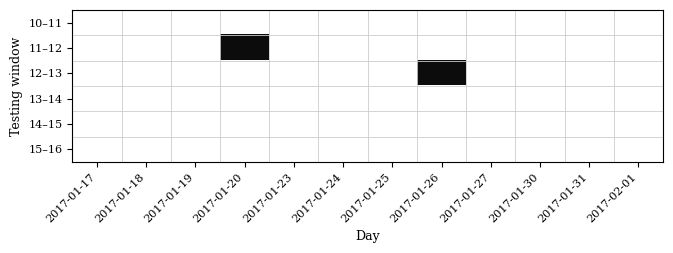

In [ ]:
from pointprocess.utils.io import result_table, analyze_table

path = f"results/multiexp_naive.json"

table = result_table(path, "tests")
analyze_table(table)
